Jessica Smith 

HW 1

version 2: 2/13/25

Code Testing & HW Questions

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

a) downloading the data

testing functions 1 & 2: load_data and subsample_50_percent_per_class

In [2]:
# Load the FashionMNIST dataset 
def load_data(batch_size=64):
    transform = transforms.Compose([transforms.ToTensor()])  # Only convert to tensor

    # Download the dataset
    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

    # Normalize data manually to the range [0, 1] ---
    #train_dataset.data = train_dataset.data/255
    #test_dataset.data = test_dataset.data/255
    print(torch.min(train_dataset.data))
    print(torch.max(train_dataset.data))
    #subsample_50_percent_per_class = train_dataset


    def subsample_50_percent_per_class(dataset):
        """
        Subsample 50% of the data from each class.
        dataset: The full dataset (e.g., FashionMNIST)
        Returns: A list of indices for the subsampled dataset
        """
        sampled_indices = []
        num_classes = 10  # FashionMNIST has 10 classes
        
        targets = dataset.targets.clone().detach()  # Convert to tensor if not already

        for class_id in range(num_classes):
            # Get all indices for the current class
            class_indices = torch.where(targets == class_id)[0]

            # Shuffle indices and select 50%
            num_samples = len(class_indices) // 2  # Take half
            selected_indices = class_indices[torch.randperm(len(class_indices))[:num_samples]]

            # Store the selected indices
            sampled_indices.extend(selected_indices.tolist())

        return sampled_indices


    # Subsampling: 50% from each class
    train_indices = subsample_50_percent_per_class(train_dataset)
    train_subset = Subset(train_dataset, train_indices)

    # DataLoader for batching
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

In [3]:
# put this function inside the first
def subsample_50_percent_per_class(dataset):
    """
    Subsample 50% of the data from each class.
    dataset: The full dataset (e.g., FashionMNIST)
    Returns: A list of indices for the subsampled dataset
    """
    sampled_indices = []
    num_classes = 10  # FashionMNIST has 10 classes
    
    targets = dataset.targets.clone().detach()  # Convert to tensor if not already

    for class_id in range(num_classes):
        # Get all indices for the current class
        class_indices = torch.where(targets == class_id)[0]

        # Shuffle indices and select 50%
        num_samples = len(class_indices) // 2  # Take half
        selected_indices = class_indices[torch.randperm(len(class_indices))[:num_samples]]

        # Store the selected indices
        sampled_indices.extend(selected_indices.tolist())

    return sampled_indices


b)	Plot 4 random images from FashionMNIST or MNIST, and their labels

In [4]:
train_loader, test_loader = load_data(64)

tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)


tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)


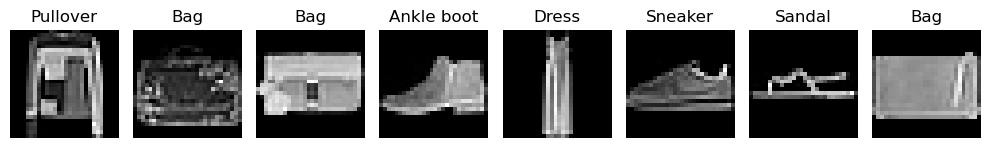

In [5]:
# Define class labels for FashionMNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Load Data
train_loader, test_loader = load_data()

# Get one batch from train_loader
images, labels = next(iter(train_loader))

# Select 4 random images
random_indices = np.random.choice(len(images), 8, replace=False)

# Plot images
fig, axes = plt.subplots(1, 8, figsize=(10, 10))
for i, idx in enumerate(random_indices):
    image = images[idx].squeeze()  # Remove channel dimension
    label = labels[idx].item()  # Convert tensor to int
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(class_labels[label])  # Get class name
    axes[i].axis("off")

plt.tight_layout()
plt.show()

Every time I reload the cell above, a new set of images is produced. Most labels are correct, but they labeled a sneaker as a sandal and something that looks like a dress as a shirt.

testing forward functions

In [6]:
# Forward pass for Fully Connected Layer
def fully_connected_forward(X, W, b):
    """
    Perform forward pass for a fully connected (linear) layer.
    X: Input data
    W: Weight matrix
    b: Bias vector
    """
    #Z = None  # TODO: Compute the linear transformation (X * W + b)
    # z = (output) is a vector of size m (number of neurons in the next layer)
    Z = np.dot(X, W) + b  # Matrix multiplication plus bias or Z = X @ W + b (for matrix multiplication)
    #Z = X * W + b
    return Z

In [ ]:
# Forward pass for ReLU activation
def relu_forward(Z):
    """
    ReLU activation function forward pass.
    Z: Linear output (input to ReLU)
    """
    # another input
    # Apply ReLU function (element-wise): could do an if statement or max function: np.maximum(0, z)
    #A = np.maximum(0, Z)
    if Z > 0:
        A = Z
    else:
        A = 0
    return A

In [8]:
# Forward pass for Softmax activation
def softmax_forward(Z):
    """
    Softmax activation function forward pass.
    Z: Output logits (before softmax)
    """
    # Apply softmax function (numerical stability)
    exp_z = np.exp(Z)
    # Normalize exp_z to get the softmax output- a probability that the item of clothing will be in a specific category
    output = exp_z / np.sum(exp_z, axis=1, keepdims=True) # the sum of all 
    return output

In [9]:
# Apply softmax function (numerical stability)
# Chain rule and derivatives: dL/dz = dL/da * da/dz
#da_dz = np.maximum(0, 1) # for reLu
#dL_da = # Derivative of chosen Loss function: 
#dL_dz = dL_da * da_dz

Backwards functions

In [10]:
# Backward pass for Softmax Layer
def softmax_backward(S, Y):
    """
    NOTE THE CORRECTION/EFFICIENCY GAIN HERE in using softmax output instead of Z
    Compute the gradient of the loss with respect to softmax output.
    S: Output of softmax 
    Y: True labels (one-hot encoded)
    """
    # Compute dZ for softmax (S - Y)
    dZ =  S - Y
    return dZ

In [11]:
# Backward pass for Fully Connected Layer (Linear)
def fully_connected_backward(X, Z, W, dZ):
    """
    NOTE CLARIFICATION HERE; dZ is an input instead of Y
    Compute gradients for the fully connected (linear) layer.
    X: Input data (Nxd)
    Z: Output of the layer before activation (logits, NxK)
    W: Weight matrix (dxK)
    dZ: Gradient of the loss with respect to Z (from the next layer)
    """
    dW = np.dot(X.T, dZ)  # Compute gradient of weights (X^T * dZ)
    db = np.dot(np.sum(dZ, axis=0, keepdims=True))  # Compute gradient of bias (sum of dZ)
    dZ = np.dot(W.T, dZ) # Compute gradient of loss with respect to Z (for backpropagation)
    return dW, db, dZ

In [12]:
# Weight update function (gradient descent)
def update_weights(weights, biases, grads_W, grads_b, learning_rate=0.01):
    """
    Implement the weight update step ---
    weights: Current weights
    biases: Current biases
    grads_W: Gradient of the weights
    grads_b: Gradient of the biases
    learning_rate: Learning rate for gradient descent
    """
    updated_weights = weights - learning_rate * grads_W  # Update weights
    updated_biases = biases - learning_rate * grads_b  # Update biases

    return updated_weights, updated_biases

Full function code block

tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
Epoch 1/1000, Loss: 0.0033127109966642186, Accuracy: 39.916666666666664%
Epoch 2/1000, Loss: 0.001623858343690547, Accuracy: 71.91333333333333%
Epoch 3/1000, Loss: 0.0012110245175569988, Accuracy: 79.54666666666667%
Epoch 4/1000, Loss: 0.0010444526116866238, Accuracy: 82.37%
Epoch 5/1000, Loss: 0.0009557312648218111, Accuracy: 83.72%
Epoch 6/1000, Loss: 0.0008849575879297247, Accuracy: 84.87666666666667%
Epoch 7/1000, Loss: 0.0008346216075527215, Accuracy: 85.53333333333333%
Epoch 8/1000, Loss: 0.0008080071501017395, Accuracy: 86.07666666666667%
Epoch 9/1000, Loss: 0.0007662921747493465, Accuracy: 86.75333333333334%
Epoch 10/1000, Loss: 0.0007406114705762218, Accuracy: 87.34333333333333%
Epoch 11/1000, Loss: 0.000718401498678219, Accuracy: 87.58333333333333%
Epoch 12/1000, Loss: 0.0006967209379643383, Accuracy: 87.99666666666667%
Epoch 13/1000, Loss: 0.0006815275838667443, Accuracy: 88.18666666666667%
Epoch 14/1000, Loss: 0.00

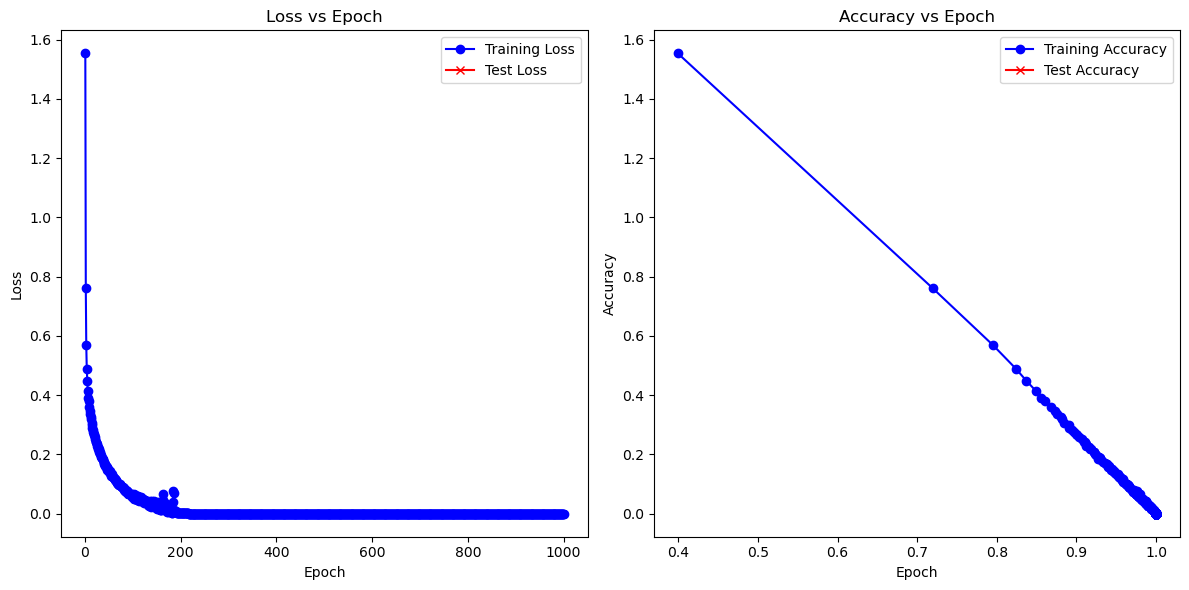

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

'''
Functions to look at that may be useful:
np.sum()
np.where()
np.maximum()
np.log()
np.exp()
np.argmax()
np.dot()
.append()
np.random.choice()

For torch tensors:
X.view()
X.numpy()
X.item()
dataset.targets
dataset.data
'''

# Load the FashionMNIST dataset 
def load_data(batch_size=64):
    transform = transforms.Compose([transforms.ToTensor()])  # Only convert to tensor

    # Download the dataset
    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

    # Normalize data manually to the range [0, 1] ---
    #train_dataset.data = train_dataset.data/255
    #test_dataset.data = test_dataset.data/255
    print(torch.min(train_dataset.data))
    print(torch.max(train_dataset.data))

    
    # Function to perform subsampling 50% from each class
    def subsample_50_percent_per_class(dataset):
        """
        Subsample 50% of the data from each class.
        dataset: The full dataset (e.g., FashionMNIST)
        Returns: A list of indices for the subsampled dataset
        """
        # Implement subsampling logic here ---
        sampled_indices = []
        #num_classes = torch. #loop over each of the 10 classes & take 50% of 
        num_classes = 10  # FashionMNIST has 10 classes
        
        targets = dataset.targets.clone().detach()  # Convert to tensor if not already

        for class_id in range(num_classes):
            # Get all indices for the current class
            class_indices = torch.where(targets == class_id)[0]

            # Shuffle indices and select 50%
            num_samples = len(class_indices) // 2  # Take half
            selected_indices = class_indices[torch.randperm(len(class_indices))[:num_samples]]

            # Store the selected indices
            sampled_indices.extend(selected_indices.tolist())
        return sampled_indices
    # Subsampling: 50% from each class
    train_indices = subsample_50_percent_per_class(train_dataset)
    train_subset = Subset(train_dataset, train_indices)

    # DataLoader for batching
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader



# Forward pass for Fully Connected Layer
def fully_connected_forward(X, W, b):
    """
    Perform forward pass for a fully connected (linear) layer.
    X: Input data
    W: Weight matrix
    b: Bias vector
    """
    #print(X.shape, W.shape, b.shape)
    Z = X @ W + b
    #Z = np.dot(X, W) + b  # Matrix multiplication plus bias or Z = X @ W + b (for matrix multiplication)  # Compute the linear transformation (X * W + b)
    #print(Z.shape)
    return Z

# Forward pass for ReLU activation
def relu_forward(Z):
    """
    ReLU activation function forward pass.
    Z: Linear output (input to ReLU)
    """
    # another input
    # Apply ReLU function (element-wise): could do an if statement or max function
    A = np.maximum(0, Z)
    #if Z > 0:
    #    A = Z
    #else:
    #    A = 0
    return A

# Forward pass for Softmax activation
def softmax_forward(Z):
    """
    Softmax activation function forward pass.
    Z: Output logits (before softmax)
    """
    # Apply softmax function (numerical stability)
    exp_z = np.exp(Z)
    # Normalize exp_z to get the softmax output- a probability that the item of clothing will be in a specific class
    output = exp_z / np.sum(exp_z, axis=1, keepdims=True) # the sum of all classes
    return output #probability

# Backward pass for Fully Connected Layer (Linear)
def fully_connected_backward(X, Z, W, dZ): #do not use Z in the calculations
    """
    NOTE CLARIFICATION HERE; dZ is an input instead of Y
    Compute gradients for the fully connected (linear) layer.
    X: Input data (Nxd)
    Z: Output of the layer before activation (logits, NxK)
    W: Weight matrix (dxK)
    dZ: Gradient of the loss with respect to Z (from the next layer)
    """
    #print(X.T.shape, dZ.shape)
    dW = np.dot(X.T, dZ)/X.shape[0]  # Compute gradient of weights (X^T * dZ)
    db = np.sum(dZ, axis=0)/ X.shape[0]  # Compute gradient of bias (sum of dZ)
    dA = np.dot(dZ, W.T) # Compute gradient of loss with respect to Z (for backpropagation)
    return dW, db, dA

# Backward pass for ReLU activation
def relu_backward(Z, dA):
    """
    Compute the gradient for ReLU activation.
    Z: Input to ReLU (before activation)
    dA: Gradient of the loss with respect to activations (from the next layer)
    """
    # Compute dZ for ReLU (gradient is 0 for Z <= 0 and dA for Z > 0)
    dZ = np.where(Z > 0, dA, 0)
    #print(dA.shape)
    #dZ = np.maximum(0, dA)  #dA = 1
    #print("dZshape is", dZ.shape)
    return dZ

# Backward pass for Softmax Layer
def softmax_backward(S, Y):
    """
    NOTE THE CORRECTION/EFFICIENCY GAIN HERE in using softmax output instead of Z
    Compute the gradient of the loss with respect to softmax output.
    S: Output of softmax 
    Y: True labels (one-hot encoded)
    """
    # Compute dZ for softmax (S - Y)
    dZ =  S - Y
    return dZ

# Weight update function (gradient descent)
def update_weights(weights, biases, grads_W, grads_b, learning_rate=0.01):
    """
    Implement the weight update step ---
    weights: Current weights
    biases: Current biases
    grads_W: Gradient of the weights
    grads_b: Gradient of the biases
    learning_rate: Learning rate for gradient descent
    """
    updated_weights = weights - learning_rate * grads_W  # Update weights
    updated_biases = biases - learning_rate * grads_b  # Update biases

    return updated_weights, updated_biases


# Define the neural network 
def train(train_loader, test_loader, epochs=10000, learning_rate=0.01):
    # Initialize weights and biases
    input_dim = 784 #image size of pixels- flattened- no spatial knowledge
    hidden_dim1 = 128   #could set differently- usually work in powers of 2
    hidden_dim2 = 64    #batch size - could set differently - if you make the hidden dims small, the image will be bad
    output_dim = 10 #class size
    
    # Initialize weights randomly
    # NOTE THE CORRECTION HERE! I HAD it done using torch but needs to be numpy
    # Note also that this is not using the specific methods I had mentioned for
    #   weight initialization (e.g. Xavier or He), this is just random
    W1 = np.random.randn(input_dim, hidden_dim1) * 0.01
    b1 = np.zeros(hidden_dim1)
    W2 = np.random.randn(hidden_dim1, hidden_dim2) * 0.01
    b2 = np.zeros(hidden_dim2)
    W3 = np.random.randn(hidden_dim2, output_dim) * 0.01
    b3 = np.zeros(output_dim)
    
    # ADD THESE to save training and test loss, accuracy
    training_loss = []
    test_loss = []
    training_accuracy = []
    test_accuracy = []
    
    # Loop through epochs
    for epoch in range(epochs):
        epoch_loss = 0
        test_epoch_loss = 0
        correct_predictions = 0
        total_correct_predictions = 0
        total_samples = 0

        for batch_idx, (X_batch, Y_batch) in enumerate(train_loader): #load data as pytorch images
            # Flatten images to vectors
            X_batch = X_batch.view(X_batch.size(0),-1)  # Flatten images to vector the -1 flattens: 28x28 image to a vector
            Y_batch = torch.eye(output_dim)[Y_batch]  # Map label indices to corresponding one-hot encoded vectors
            
            # CONVERT TORCH TENSORS to numpy
            X = X_batch.numpy()
            y = Y_batch.numpy()

            # Implement the forward pass ---
            Z1 = fully_connected_forward(X, W1, b1) 
            A1 = relu_forward(Z1)
            #print(A1.shape)
            Z2 = fully_connected_forward(A1, W2, b2)
            A2 = relu_forward(Z2)
            Z3 = fully_connected_forward(A2, W3, b3)
            Y_pred = softmax_forward(Z3)
            
            # Implement loss computation ---
            # for the first 64
            # Corss-Entropy Loss
            loss = -np.sum(y * np.log(Y_pred)) / Y_batch.size(0) #batch_size

            #for the whole dataset- all of the added loss for each batch (can average each)
            epoch_loss += loss # add the loss- it should get higher and higher w each batch
            
            # Implement backward pass ---
            #print("y shapes:", Y_pred.shape, y.shape)
            dZ3 = softmax_backward(Y_pred, y)
            #print("dZ3 is", dZ3.shape)
            #print("A2 and W3", A2.shape, W3.shape)
            dW3, db3, dA2 = fully_connected_backward(A2, Z1, W3, dZ3) #same order (does not use Z1)
            #print("ran here")
            #print("dW3, db3, dA2 shapes", dW3.shape, db3.shape, dA2.shape)
            #print("Z2 dA2", Z2.shape, dA2.shape)
            dZ2 = relu_backward(Z2, dA2)
            #print("dZ2", dZ2.shape)
            dW2, db2, dA1 = fully_connected_backward(A1, Z2, W2, dZ2)
            dZ1 = relu_backward(Z1, dA1)
            dW1, db1, dX = fully_connected_backward(X, Z1, W1, dZ1)

            # Implement weight update ---
            W1, b1 = update_weights(W1, b1, dW1, db1, learning_rate)
            W2, b2 = update_weights(W2, b2, dW2, db2, learning_rate)
            W3, b3 = update_weights(W3, b3, dW3, db3, learning_rate)

            # Track accuracy
            #for this batch

            predicted_classes = np.argmax(Y_pred, axis = 1)
            true_classes = np.argmax(y, axis = 1)
            correct_predictions = np.sum(predicted_classes == true_classes)
            total_correct_predictions += correct_predictions #for the entire epoch
            total_samples += len(y) #for entire epoch: np.sum() #sum of total_correct_predictions and Y_pred?

        # ave loss per batch instead of the overall loss per epoch
        epoch_loss = epoch_loss/len(train_loader)

        # Print out the progress - CLARIFIED
        train_accuracy = total_correct_predictions / total_samples
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader)}, Accuracy: {train_accuracy * 100}%")
        # Save the training loss and accuracy for each epoch to plot later
        training_loss.append(epoch_loss) #tracks the training accuracy over time
        training_accuracy.append(train_accuracy)

        # For every 100 epochs, get the validation loss and error
        # FREQUENCY OF THIS IS CHANGED FROM EVERY 1000 to EVERY 100
        # need to do this for xbatch and y batch and use trainloader to get next batch of 64- want one test for every 100 train
        # use test_loader- do only forward part
        # Index of the correct class- the largest prob is what it chooses
        if epoch % 100 == 0: #gives the remainder- if epoch is 100, then output will = 0
            #test process
        
            for batch_idx, (X_batch, Y_batch) in enumerate(train_loader): #load data as pytorch images
                # Flatten images to vectors
                X_batch = X_batch.view(X_batch.size(0),-1)  # Flatten images to vector the -1 flattens: 28x28 image to a vector
                Y_batch = torch.eye(output_dim)[Y_batch]  # Map label indices to corresponding one-hot encoded vectors
                
                # CONVERT TORCH TENSORS to numpy
                X = X_batch.numpy()
                y = X_batch.numpy()

                # Implement the forward pass- changed some variable names
                z1 = fully_connected_forward(X, W1, b1)
                a1 = relu_forward(z1)
                z2 = fully_connected_forward(a1, W2, b2)
                a2 = relu_forward(z2)
                z3 = fully_connected_forward(a2, W3, b3)
                y_pred = np.argmax(Y_pred)
        
        # Save the test loss and accuracy for every 100th epoch to plot later
        predicted_classes = np.argmax(y_pred, axis = 1)
        true_classes = np.argmax(y, axis = 1)
        correct_predictions = np.sum(predicted_classes == true_classes)
        total_correct_predictions += correct_predictions #for the entire epoch
        total_samples += len(y)
        test_accuracy = total_correct_predictions / total_samples
        #print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader)}, Accuracy: {train_accuracy * 100}%")
                    
        test_loss.append(epoch_loss)
        test_accuracy.append(test_accuracy)


    return training_loss, training_accuracy, test_loss, test_accuracy
    print("Training complete!")

# Main function
def main():
    batch_size = 64
    train_loader, test_loader = load_data(batch_size)

    # Start training
    training_loss, training_accuracy, test_loss, test_accuracy = train(train_loader, test_loader, epochs=1000, learning_rate=0.1)
    
    
    # PLOT TRAINING LOSS AND TEST LOSS ON ONE SUBPLOT (epoch vs loss)
    # PLOT TRAINING ACCURACY AND TEST ACCURACY ON A SECOND SUBPLOT (epoch vs accuracy)
    
    epochs_train = list(range(1, len(training_loss) + 1))  # Epochs for training loss (1, 2, ..., N)
    epochs_test = list(range(100, (len(test_loss) + 1) * 100, 100))  # Epochs for test loss (100, 200, ..., N*100)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot Training and Test Loss on the first subplot
    ax1.plot(epochs_train, training_loss, label='Training Loss', color='blue', marker='o')
    ax1.plot(epochs_test, test_loss, label='Test Loss', color='red', marker='x')
    ax1.set_title('Loss vs Epoch')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot Training and Test Accuracy on the second subplot
    ax2.plot(training_accuracy, training_loss, label='Training Accuracy', color='blue', marker='o')
    ax2.plot(test_accuracy, test_loss, label='Test Accuracy', color='red', marker='x')
    ax2.set_title('Accuracy vs Epoch')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()


For the training loss vs the number of weight updates (epoch), there is an exponential curve. This means that I likely didn't need 1000 epochs. The loss on the curve settles to basically 0 at about 200 epochs. The first starts at about 1.55 loss.

For the training accuracy vs the number of weight updates (epoch), there is a linear line, but the points exponentially get closer together the further along the epoch is. I am not sure why the x-axis is from .4 to 1, but the accuracy is clustered closer to the bottom right of the graph as opposed to the top left. 

Plotting: 

n) Plot the test loss and test error for every 500th weight update. How does this compare to training loss and error? Is it what you would expect, and why or why not?


o) Plot 8 images that were labeled correctly, and 8 that were labeled incorrectly. Do you have any observations?


In [ ]:
# Ensure `test_loss` and `test_error` are lists (store values every 500 updates)
updates_500 = list(range(500, len(test_loss) * 500 + 1, 500))  # 500, 1000, ..., N*500
updates_train = list(range(1, len(training_loss) + 1))  # Every weight update

# Plot Test vs Training Loss
plt.figure(figsize=(10, 5))
plt.plot(updates_train, training_loss, label="Training Loss", color="blue")
plt.plot(updates_500, test_loss, label="Test Loss", color="red", linestyle="dashed", marker="o")
plt.xlabel("Weight Updates")
plt.ylabel("Loss")
plt.title("Training vs Test Loss")
plt.legend()
plt.show()

# Plot Test vs Training Error
plt.figure(figsize=(10, 5))
plt.plot(updates_train, training_error, label="Training Error", color="green")
plt.plot(updates_500, test_error, label="Test Error", color="orange", linestyle="dashed", marker="o")
plt.xlabel("Weight Updates")
plt.ylabel("Error Rate")
plt.title("Training vs Test Error")
plt.legend()
plt.show()


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

'''
Functions to look at that may be useful:
np.sum()
np.where()
np.maximum()
np.log()
np.exp()
np.argmax()
np.dot()
.append()
np.random.choice()

For torch tensors:
X.view()
X.numpy()
X.item()
dataset.targets
dataset.data
'''

# Load the FashionMNIST dataset 
def load_data(batch_size=64):
    transform = transforms.Compose([transforms.ToTensor()])  # Only convert to tensor

    # Download the dataset
    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

    # Normalize data manually to the range [0, 1] ---
    #train_dataset.data = train_dataset.data/255
    #test_dataset.data = test_dataset.data/255
    print(torch.min(train_dataset.data))
    print(torch.max(train_dataset.data))

    
    # Function to perform subsampling 50% from each class
    def subsample_50_percent_per_class(dataset):
        """
        Subsample 50% of the data from each class.
        dataset: The full dataset (e.g., FashionMNIST)
        Returns: A list of indices for the subsampled dataset
        """
        # Implement subsampling logic here ---
        sampled_indices = []
        #num_classes = torch. #loop over each of the 10 classes & take 50% of 
        num_classes = 10  # FashionMNIST has 10 classes
        
        targets = dataset.targets.clone().detach()  # Convert to tensor if not already

        for class_id in range(num_classes):
            # Get all indices for the current class
            class_indices = torch.where(targets == class_id)[0]

            # Shuffle indices and select 50%
            num_samples = len(class_indices) // 2  # Take half
            selected_indices = class_indices[torch.randperm(len(class_indices))[:num_samples]]

            # Store the selected indices
            sampled_indices.extend(selected_indices.tolist())
        return sampled_indices
    # Subsampling: 50% from each class
    train_indices = subsample_50_percent_per_class(train_dataset)
    train_subset = Subset(train_dataset, train_indices)

    # DataLoader for batching
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader



# Forward pass for Fully Connected Layer
def fully_connected_forward(X, W, b):
    """
    Perform forward pass for a fully connected (linear) layer.
    X: Input data
    W: Weight matrix
    b: Bias vector
    """
    #print(X.shape, W.shape, b.shape)
    Z = X @ W + b
    #Z = np.dot(X, W) + b  # Matrix multiplication plus bias or Z = X @ W + b (for matrix multiplication)  # Compute the linear transformation (X * W + b)
    #print(Z.shape)
    return Z

# Forward pass for ReLU activation
def relu_forward(Z):
    """
    ReLU activation function forward pass.
    Z: Linear output (input to ReLU)
    """
    # another input
    # Apply ReLU function (element-wise): could do an if statement or max function
    A = np.maximum(0, Z)
    #if Z > 0:
    #    A = Z
    #else:
    #    A = 0
    return A

# Forward pass for Softmax activation
def softmax_forward(Z):
    """
    Softmax activation function forward pass.
    Z: Output logits (before softmax)
    """
    # Apply softmax function (numerical stability)
    exp_z = np.exp(Z)
    # Normalize exp_z to get the softmax output- a probability that the item of clothing will be in a specific class
    output = exp_z / np.sum(exp_z, axis=1, keepdims=True) # the sum of all classes
    return output #probability

# Backward pass for Fully Connected Layer (Linear)
def fully_connected_backward(X, Z, W, dZ): #do not use Z in the calculations
    """
    NOTE CLARIFICATION HERE; dZ is an input instead of Y
    Compute gradients for the fully connected (linear) layer.
    X: Input data (Nxd)
    Z: Output of the layer before activation (logits, NxK)
    W: Weight matrix (dxK)
    dZ: Gradient of the loss with respect to Z (from the next layer)
    """
    #print(X.T.shape, dZ.shape)
    dW = np.dot(X.T, dZ)/X.shape[0]  # Compute gradient of weights (X^T * dZ)
    db = np.sum(dZ, axis=0)/ X.shape[0]  # Compute gradient of bias (sum of dZ)
    dA = np.dot(dZ, W.T) # Compute gradient of loss with respect to Z (for backpropagation)
    return dW, db, dA

# Backward pass for ReLU activation
def relu_backward(Z, dA):
    """
    Compute the gradient for ReLU activation.
    Z: Input to ReLU (before activation)
    dA: Gradient of the loss with respect to activations (from the next layer)
    """
    # Compute dZ for ReLU (gradient is 0 for Z <= 0 and dA for Z > 0)
    dZ = np.where(Z > 0, dA, 0)
    #print(dA.shape)
    #dZ = np.maximum(0, dA)  #dA = 1
    #print("dZshape is", dZ.shape)
    return dZ

# Backward pass for Softmax Layer
def softmax_backward(S, Y):
    """
    NOTE THE CORRECTION/EFFICIENCY GAIN HERE in using softmax output instead of Z
    Compute the gradient of the loss with respect to softmax output.
    S: Output of softmax 
    Y: True labels (one-hot encoded)
    """
    # Compute dZ for softmax (S - Y)
    dZ =  S - Y
    return dZ

# Weight update function (gradient descent)
def update_weights(weights, biases, grads_W, grads_b, learning_rate=0.01):
    """
    Implement the weight update step ---
    weights: Current weights
    biases: Current biases
    grads_W: Gradient of the weights
    grads_b: Gradient of the biases
    learning_rate: Learning rate for gradient descent
    """
    updated_weights = weights - learning_rate * grads_W  # Update weights
    updated_biases = biases - learning_rate * grads_b  # Update biases

    return updated_weights, updated_biases


# Define the neural network 
def train(train_loader, test_loader, epochs=10000, learning_rate=0.01):
    # Initialize weights and biases
    input_dim = 784 #image size of pixels- flattened- no spatial knowledge
    hidden_dim1 = 128   #could set differently- usually work in powers of 2
    hidden_dim2 = 64    #batch size - could set differently - if you make the hidden dims small, the image will be bad
    output_dim = 10 #class size
    
    # Initialize weights randomly
    # NOTE THE CORRECTION HERE! I HAD it done using torch but needs to be numpy
    # Note also that this is not using the specific methods I had mentioned for
    #   weight initialization (e.g. Xavier or He), this is just random
    W1 = np.random.randn(input_dim, hidden_dim1) * 0.01
    b1 = np.zeros(hidden_dim1)
    W2 = np.random.randn(hidden_dim1, hidden_dim2) * 0.01
    b2 = np.zeros(hidden_dim2)
    W3 = np.random.randn(hidden_dim2, output_dim) * 0.01
    b3 = np.zeros(output_dim)
    
    # ADD THESE to save training and test loss, accuracy
    training_loss = []
    test_loss = []
    training_accuracy = []
    test_accuracy = []
    
    # Loop through epochs
    for epoch in range(epochs):
        epoch_loss = 0
        test_epoch_loss = 0
        correct_predictions = 0
        total_correct_predictions = 0
        total_samples = 0

        for batch_idx, (X_batch, Y_batch) in enumerate(train_loader): #load data as pytorch images
            # Flatten images to vectors
            X_batch = X_batch.view(X_batch.size(0),-1)  # Flatten images to vector the -1 flattens: 28x28 image to a vector
            Y_batch = torch.eye(output_dim)[Y_batch]  # Map label indices to corresponding one-hot encoded vectors
            
            # CONVERT TORCH TENSORS to numpy
            X = X_batch.numpy()
            y = Y_batch.numpy()

            # Implement the forward pass ---
            Z1 = fully_connected_forward(X, W1, b1) 
            A1 = relu_forward(Z1)
            #print(A1.shape)
            Z2 = fully_connected_forward(A1, W2, b2)
            A2 = relu_forward(Z2)
            Z3 = fully_connected_forward(A2, W3, b3)
            Y_pred = softmax_forward(Z3)
            
            # Implement loss computation ---
            # for the first 64
            # Corss-Entropy Loss
            loss = -np.sum(y * np.log(Y_pred)) / Y_batch.size(0) #batch_size

            #for the whole dataset- all of the added loss for each batch (can average each)
            epoch_loss += loss # add the loss- it should get higher and higher w each batch
            
            # Implement backward pass ---
            #print("y shapes:", Y_pred.shape, y.shape)
            dZ3 = softmax_backward(Y_pred, y)
            #print("dZ3 is", dZ3.shape)
            #print("A2 and W3", A2.shape, W3.shape)
            dW3, db3, dA2 = fully_connected_backward(A2, Z1, W3, dZ3) #same order (does not use Z1)
            #print("ran here")
            #print("dW3, db3, dA2 shapes", dW3.shape, db3.shape, dA2.shape)
            #print("Z2 dA2", Z2.shape, dA2.shape)
            dZ2 = relu_backward(Z2, dA2)
            #print("dZ2", dZ2.shape)
            dW2, db2, dA1 = fully_connected_backward(A1, Z2, W2, dZ2)
            dZ1 = relu_backward(Z1, dA1)
            dW1, db1, dX = fully_connected_backward(X, Z1, W1, dZ1)

            # Implement weight update ---
            W1, b1 = update_weights(W1, b1, dW1, db1, learning_rate)
            W2, b2 = update_weights(W2, b2, dW2, db2, learning_rate)
            W3, b3 = update_weights(W3, b3, dW3, db3, learning_rate)

            # Track accuracy
            #for this batch

            predicted_classes = np.argmax(Y_pred, axis = 1)
            true_classes = np.argmax(y, axis = 1)
            correct_predictions = np.sum(predicted_classes == true_classes)
            total_correct_predictions += correct_predictions #for the entire epoch
            total_samples += len(y) #for entire epoch: np.sum() #sum of total_correct_predictions and Y_pred?

        # ave loss per batch instead of the overall loss per epoch
        epoch_loss = epoch_loss/len(train_loader)

        # Print out the progress - CLARIFIED
        train_accuracy = total_correct_predictions / total_samples
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader)}, Accuracy: {train_accuracy * 100}%")
        # Save the training loss and accuracy for each epoch to plot later
        training_loss.append(epoch_loss) #tracks the training accuracy over time
        training_accuracy.append(train_accuracy)

        # For every 100 epochs, get the validation loss and error
        # FREQUENCY OF THIS IS CHANGED FROM EVERY 1000 to EVERY 100
        # need to do this for xbatch and y batch and use trainloader to get next batch of 64- want one test for every 100 train
        # use test_loader- do only forward part
        # Index of the correct class- the largest prob is what it chooses
        if epoch % 100 == 0: #gives the remainder- if epoch is 100, then output will = 0
            #test process
        
            for batch_idx, (X_batch, Y_batch) in enumerate(train_loader): #load data as pytorch images
                # Flatten images to vectors
                X_batch = X_batch.view(X_batch.size(0),-1)  # Flatten images to vector the -1 flattens: 28x28 image to a vector
                Y_batch = torch.eye(output_dim)[Y_batch]  # Map label indices to corresponding one-hot encoded vectors
                
                # CONVERT TORCH TENSORS to numpy
                X = X_batch.numpy()
                y = X_batch.numpy()

                # Implement the forward pass- changed some variable names
                z1 = fully_connected_forward(X, W1, b1)
                a1 = relu_forward(z1)
                z2 = fully_connected_forward(a1, W2, b2)
                a2 = relu_forward(z2)
                z3 = fully_connected_forward(a2, W3, b3)
                y_pred = np.argmax(Y_pred)
        
                # Save the test loss and accuracy for every 100th epoch to plot later
                predicted_classes = y_pred
                true_classes = np.argmax(y, axis = 1)
                correct_predictions = np.sum(predicted_classes == true_classes)
                total_correct_predictions += correct_predictions #for the entire epoch
                total_samples += len(y)
                test_accuracy = total_correct_predictions / total_samples
                 # ave loss per batch instead of the overall loss per epoch
                epoch_loss = epoch_loss/len(train_loader)
                test_loss = epoch_loss
                #print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader)}, Accuracy: {train_accuracy * 100}%")
                


    return training_loss, training_accuracy, test_loss, test_accuracy
    print("Training complete!")

# Main function
def main():
    batch_size = 64
    train_loader, test_loader = load_data(batch_size)

    # Start training
    training_loss, training_accuracy, test_loss, test_accuracy = train(train_loader, test_loader, epochs=100, learning_rate=0.1)
    
    
    # PLOT TRAINING LOSS AND TEST LOSS ON ONE SUBPLOT (epoch vs loss)
    # PLOT TRAINING ACCURACY AND TEST ACCURACY ON A SECOND SUBPLOT (epoch vs accuracy)
    
    epochs_train = list(range(1, len(training_loss) + 1))  # Epochs for training loss (1, 2, ..., N)
    epochs_test = list(range(100, (len(test_loss) + 1) * 100, 100))  # Epochs for test loss (100, 200, ..., N*100)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot Training and Test Loss on the first subplot
    ax1.plot(epochs_train, training_loss, label='Training Loss', color='blue', marker='o')
    ax1.plot(epochs_test, test_loss, label='Test Loss', color='red', marker='x')
    ax1.set_title('Loss vs Epoch')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot Training and Test Accuracy on the second subplot
    ax2.plot(training_accuracy, training_loss, label='Training Accuracy', color='blue', marker='o')
    ax2.plot(test_accuracy, test_loss, label='Test Accuracy', color='red', marker='x')
    ax2.set_title('Accuracy vs Epoch')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()



tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
Epoch 1/100, Loss: 0.0035318617946547962, Accuracy: 35.05666666666667%
Epoch 2/100, Loss: 0.0016340252348441364, Accuracy: 71.46333333333334%
Epoch 3/100, Loss: 0.001246659658152132, Accuracy: 79.06333333333333%
Epoch 4/100, Loss: 0.0010639368201311404, Accuracy: 82.09333333333333%
Epoch 5/100, Loss: 0.0009689140604890949, Accuracy: 83.43666666666667%
Epoch 6/100, Loss: 0.0008949919161169545, Accuracy: 84.72666666666666%
Epoch 7/100, Loss: 0.0008407245813974403, Accuracy: 85.61999999999999%
Epoch 8/100, Loss: 0.0008052547364061155, Accuracy: 86.18333333333334%
Epoch 9/100, Loss: 0.0007785813517181951, Accuracy: 86.60333333333334%
Epoch 10/100, Loss: 0.0007431614876128071, Accuracy: 87.22%
Epoch 11/100, Loss: 0.0007227631761479794, Accuracy: 87.58333333333333%
Epoch 12/100, Loss: 0.0006915979725667053, Accuracy: 88.17333333333333%
Epoch 13/100, Loss: 0.0006722039796298688, Accuracy: 88.42333333333333%
Epoch 14/100, Loss: 0.0006

TypeError: object of type 'numpy.float64' has no len()